Problem Statement:

Avocado is a fruit consumed by people heavily in the United States.

Content This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV.

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold



In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [10]:
# Importing Data 
df=pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Checking for Dublicate values

In [64]:
sum(df.duplicated())

0

There is no duplicate

In [11]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [4]:
df['region'].value_counts()

Northeast              338
Albany                 338
Portland               338
GreatLakes             338
Indianapolis           338
NewYork                338
West                   338
Plains                 338
DallasFtWorth          338
GrandRapids            338
PhoenixTucson          338
Detroit                338
Houston                338
Columbus               338
Pittsburgh             338
NewOrleansMobile       338
RaleighGreensboro      338
BuffaloRochester       338
Orlando                338
SanDiego               338
Nashville              338
RichmondNorfolk        338
Spokane                338
NorthernNewEngland     338
Boston                 338
StLouis                338
BaltimoreWashington    338
CincinnatiDayton       338
MiamiFtLauderdale      338
Roanoke                338
SouthCarolina          338
California             338
Midsouth               338
Southeast              338
Charlotte              338
Seattle                338
Syracuse               338
S

In [5]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [12]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

there is uncertain values are present in first column that is why i am droping that

Data Visualization

In [13]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

 Univariate Variable Analysis

In [14]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


Target variable seems to be normally distributed as mean and 50% is so close

In [65]:
#mean of Average Price
df['AveragePrice'].mean()

1.4059784097758825

<AxesSubplot:>

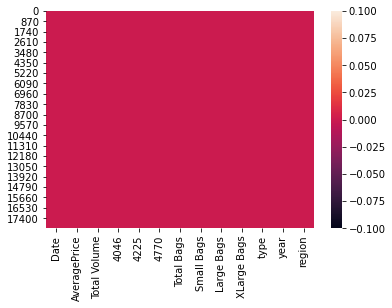

In [15]:
sns.heatmap(df.isnull())

too much gap in 75% to max value therefore outliers are present in the dataset. std is very high.

In [16]:
df.shape

(18249, 13)

<AxesSubplot:>

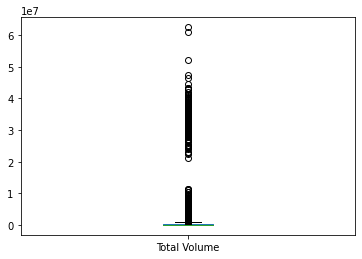

In [17]:
df['Total Volume'].plot.box()

lots of outliers are present.

AveragePrice       AxesSubplot(0.125,0.125;0.065678x0.755)
Total Volume    AxesSubplot(0.203814,0.125;0.065678x0.755)
4046            AxesSubplot(0.282627,0.125;0.065678x0.755)
4225            AxesSubplot(0.361441,0.125;0.065678x0.755)
4770            AxesSubplot(0.440254,0.125;0.065678x0.755)
Total Bags      AxesSubplot(0.519068,0.125;0.065678x0.755)
Small Bags      AxesSubplot(0.597881,0.125;0.065678x0.755)
Large Bags      AxesSubplot(0.676695,0.125;0.065678x0.755)
XLarge Bags     AxesSubplot(0.755508,0.125;0.065678x0.755)
year            AxesSubplot(0.834322,0.125;0.065678x0.755)
dtype: object

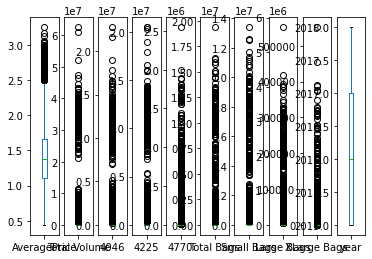

In [18]:
df.plot(kind='box',subplots=True)

Here almost in every column there are outliers present.

<AxesSubplot:xlabel='AveragePrice', ylabel='Total Volume'>

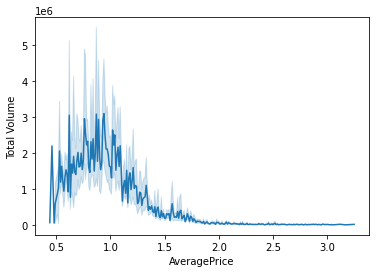

In [19]:
sns.lineplot(x='AveragePrice',y='Total Volume',data=df)

this indicates as the average price is low then our total volume is high and vise-versa

In [20]:
df['Date'].value_counts()

2017-01-01    108
2015-11-22    108
2015-04-12    108
2015-06-07    108
2016-07-17    108
             ... 
2015-03-29    108
2017-02-05    108
2017-06-25    107
2017-06-18    107
2015-12-06    107
Name: Date, Length: 169, dtype: int64

In [21]:
df['year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

<AxesSubplot:xlabel='Date', ylabel='AveragePrice'>

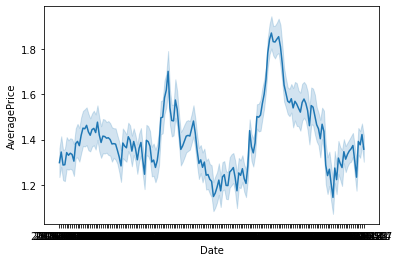

In [22]:
sns.lineplot(x='Date',y='AveragePrice',data=df)

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

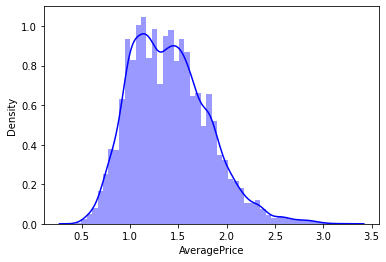

In [25]:
sns.distplot((df.AveragePrice), color="b")

<AxesSubplot:ylabel='Frequency'>

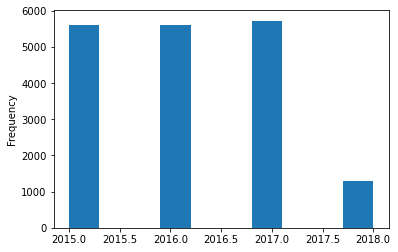

In [26]:
df['year'].plot(kind='hist')

In [27]:
le=LabelEncoder()
df['type']=le.fit_transform(df['type'])
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,WestTexNewMexico


converted the type column into 2 classes of avocado

<AxesSubplot:ylabel='Frequency'>

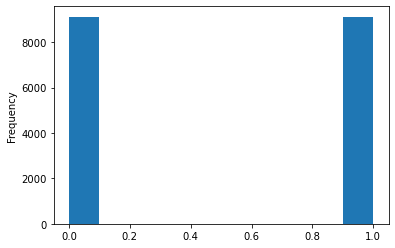

In [28]:
df['type'].plot(kind='hist')

In [29]:
df['type'].value_counts()

0    9126
1    9123
Name: type, dtype: int64

this indicates that are conventional avocado have more orders than organic

<AxesSubplot:xlabel='AveragePrice'>

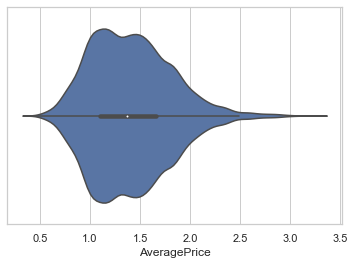

In [30]:
sns.set(style='whitegrid')
sns.violinplot(df['AveragePrice'])

 the data are in range of 1.0 - 1.25

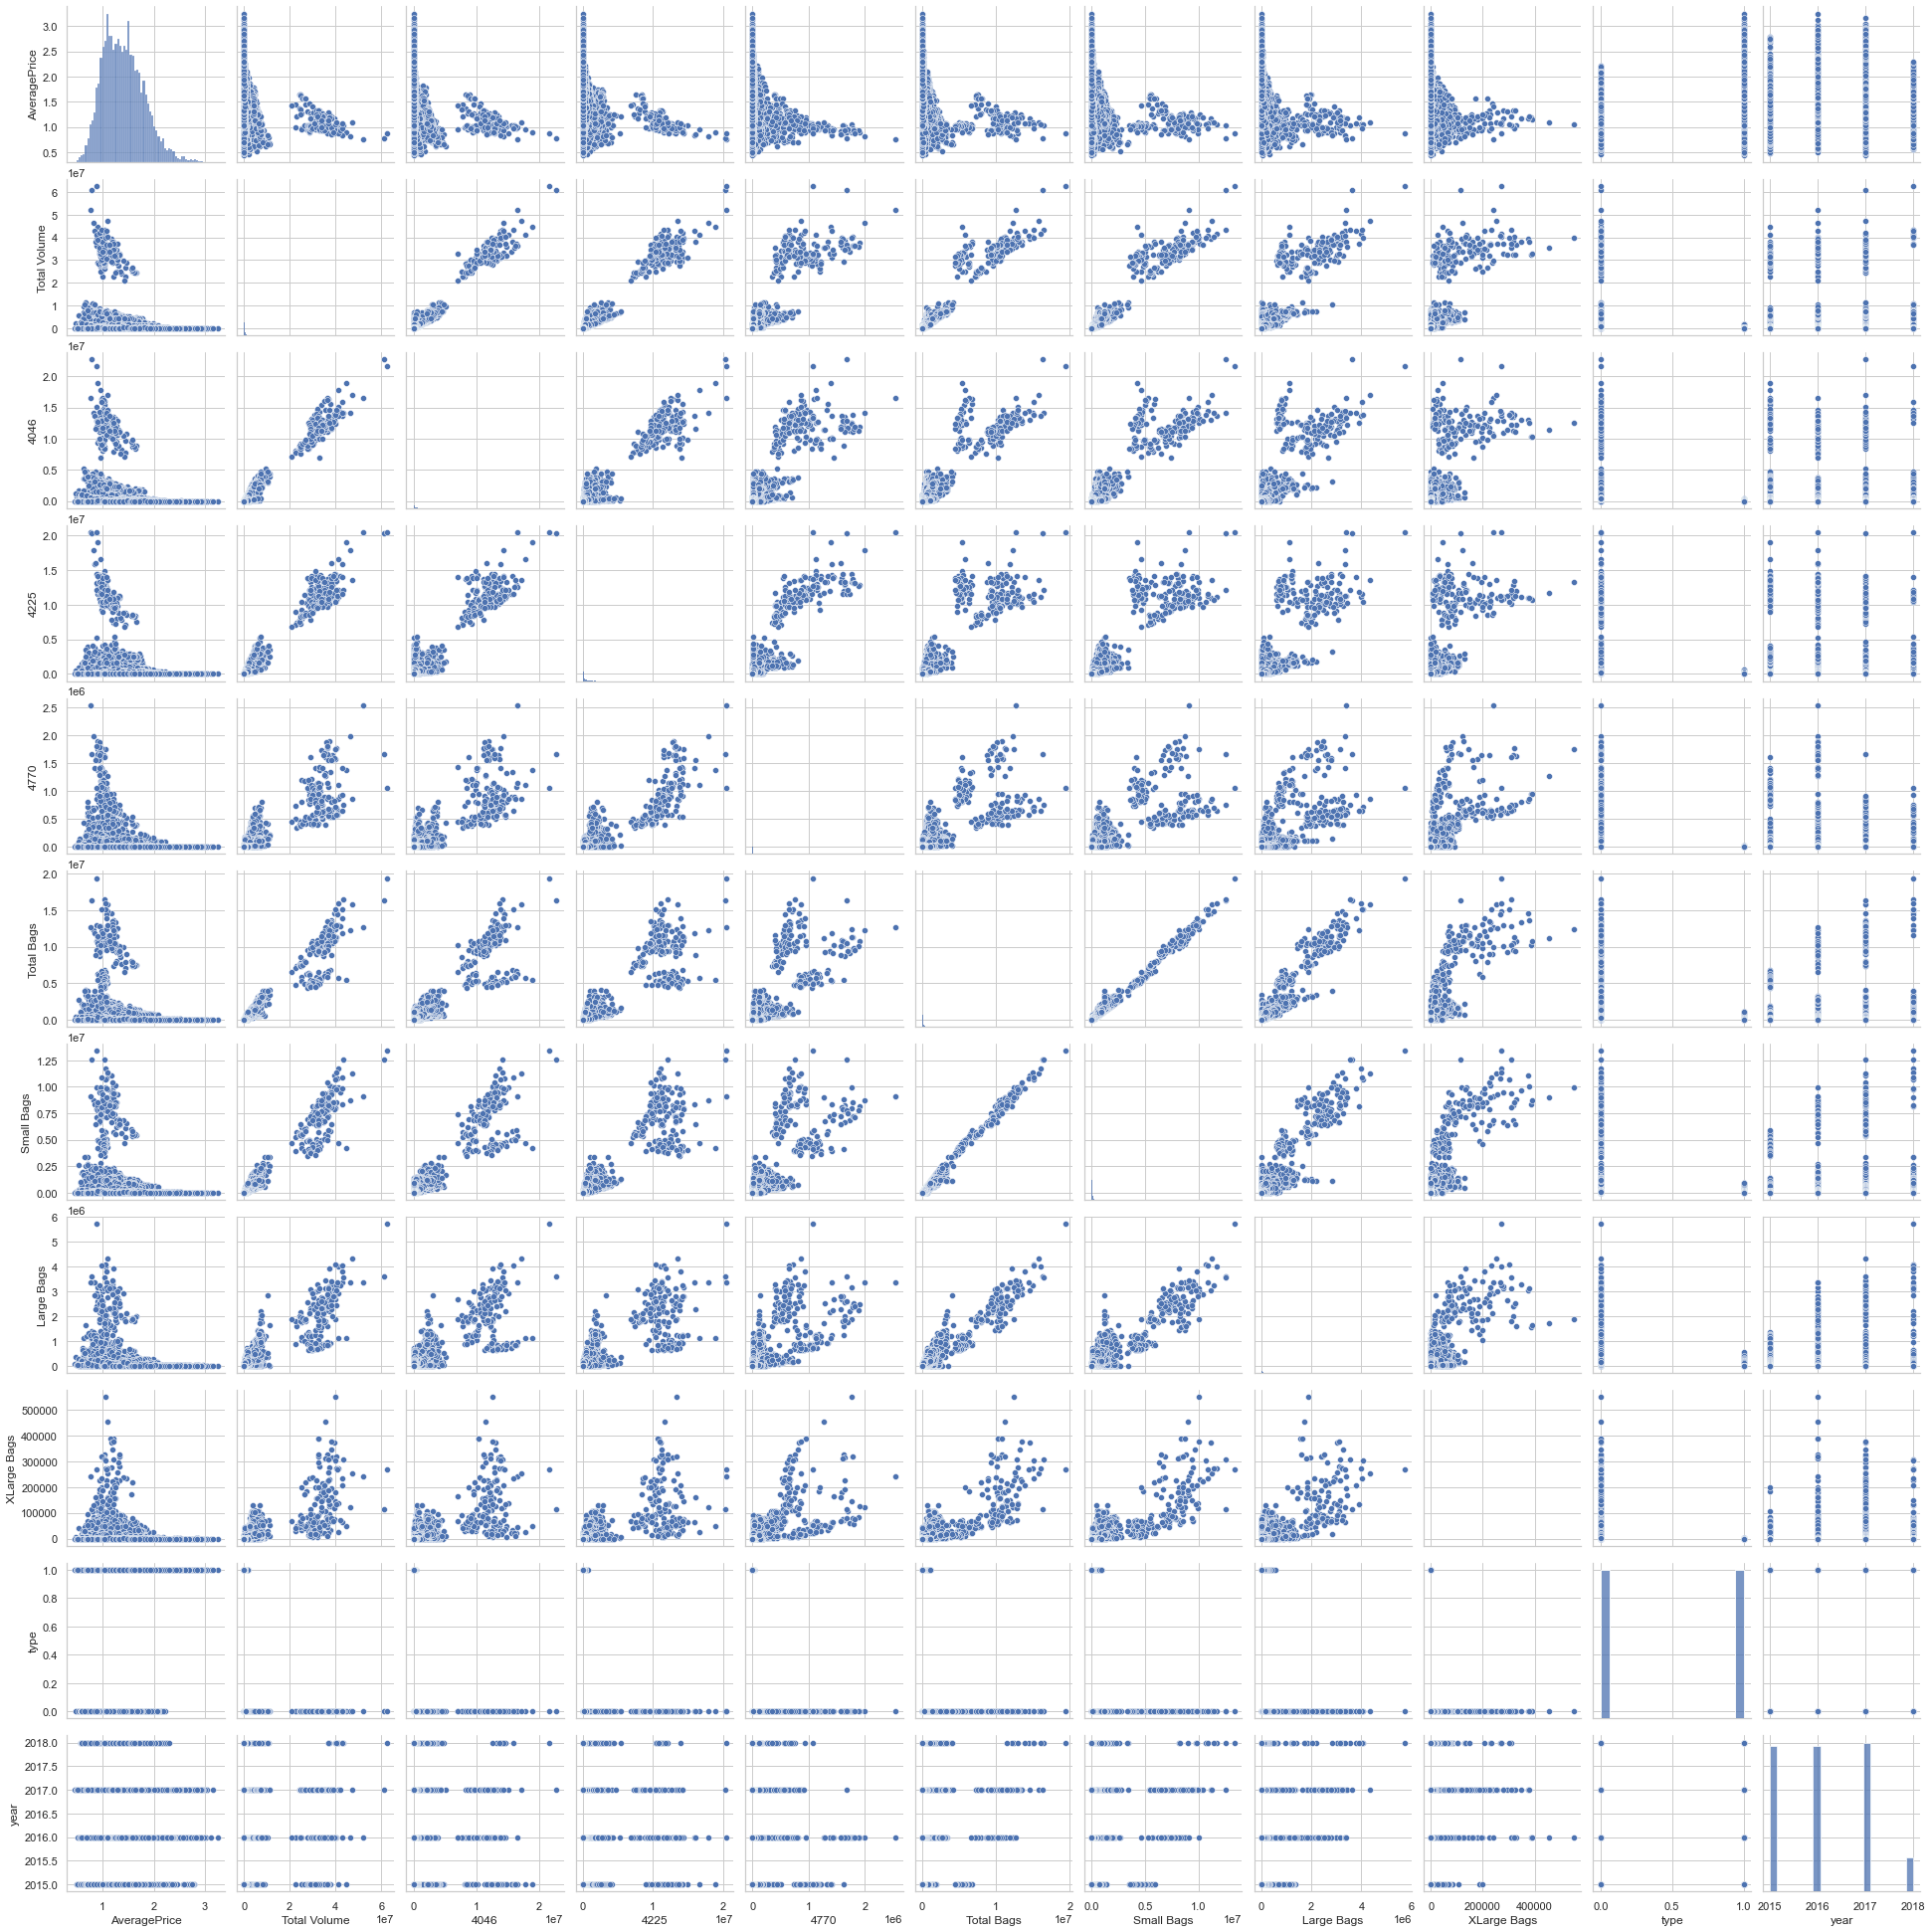

In [32]:
sns.pairplot(df)

Data spread seens to have skewness

In [33]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
dtype: float64

skewneww present in total volume 4770, XLarge Bags

In [70]:
#Skewness REMOVE
pt=PowerTransformer()
for x in df.columns.drop('AveragePrice'):
    if abs(df.loc[:,x].skew())>1:
        df.loc[:,x]=pt.fit_transform(df.loc[:,x].values.reshape(-1,1))

In [71]:
df.skew()

AveragePrice    0.580303
Total Volume    0.011171
4046           -0.022679
4225           -0.017740
4770            0.032184
Total Bags     -0.001626
Small Bags      0.007058
Large Bags     -0.073809
XLarge Bags     0.793520
type            0.000329
dtype: float64

<AxesSubplot:>

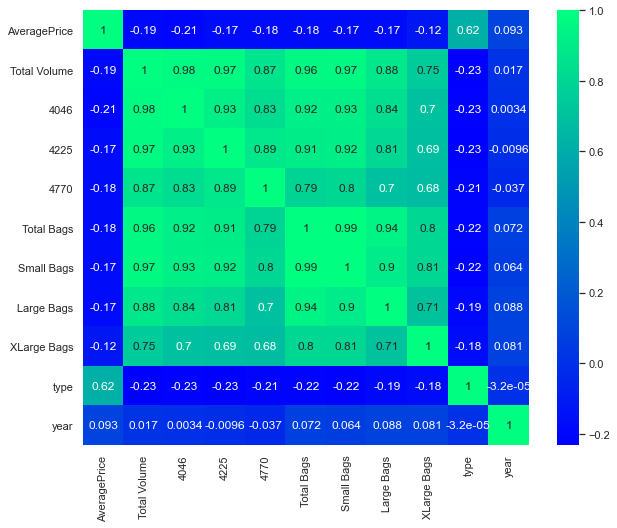

In [34]:
#PLOT AFTER REMOVING SKEWNESS 
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap='winter',annot=True)

the dataset in highy correlated.

Removing outliers

In [37]:
df.drop(['year'],axis=1,inplace=True)

In [38]:
df.drop(['Date'],axis=1,inplace=True)

In [39]:
df.drop(['region'],axis=1,inplace=True)

In [40]:
threshold=3
z=np.abs(zscore(df))
z

array([[0.18868864, 0.22771641, 0.23081597, ..., 0.22235202, 0.17557961,
        0.99983562],
       [0.13901962, 0.23042664, 0.23110251, ..., 0.22233464, 0.17557961,
        0.99983562],
       [1.18206895, 0.21208462, 0.23100731, ..., 0.22231148, 0.17557961,
        0.99983562],
       ...,
       [1.15237477, 0.24233073, 0.2306933 , ..., 0.22256082, 0.17557961,
        1.00016441],
       [1.30138182, 0.24162464, 0.2304279 , ..., 0.2225293 , 0.17557961,
        1.00016441],
       [0.53151208, 0.24125273, 0.22934712, ..., 0.22262764, 0.17557961,
        1.00016441]])

In [41]:
df_new=df[(z<3).all(axis=1)]
df_new.shape

(17651, 10)

In [42]:
df.shape

(18249, 10)

we have removed all the outliers that were present in the dataset.

In [ ]:
Model Selection

In [43]:
x=df_new.drop(['type'],axis=1)

In [44]:
y=df_new['type']

In [45]:
sc=StandardScaler()
x=sc.fit_transform(x)
x=pd.DataFrame(x)

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=43)

In [48]:
x_train.shape

(12355, 9)

In [49]:
x_test.shape

(5296, 9)

In [50]:
y_train.shape

(12355,)

In [51]:
y_test.shape

(5296,)

ML ALGORTHIM
Define a function to try different train test folds

In [52]:
models=[LogisticRegression(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),GaussianNB()]

In [53]:
for m in models:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('the accuracy score of',m,'is:',accuracy_score(y_test,predm))
    print('confusion matrix of',m,confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))

the accuracy score of LogisticRegression() is: 0.9369335347432024
confusion matrix of LogisticRegression() [[2347  252]
 [  82 2615]]
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      2599
           1       0.91      0.97      0.94      2697

    accuracy                           0.94      5296
   macro avg       0.94      0.94      0.94      5296
weighted avg       0.94      0.94      0.94      5296

the accuracy score of SVC() is: 0.9509063444108762
confusion matrix of SVC() [[2436  163]
 [  97 2600]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      2599
           1       0.94      0.96      0.95      2697

    accuracy                           0.95      5296
   macro avg       0.95      0.95      0.95      5296
weighted avg       0.95      0.95      0.95      5296

the accuracy score of DecisionTreeClassifier() is: 0.9858383685800605
confusion matrix of DecisionTreeClassi

from these results we can decide that our model is working with least errors on decision tree classifiers

In [54]:
dtc=DecisionTreeClassifier()
parameters={'criterion':['gini','entropy'],'random_state':range(40,100)}
clf=GridSearchCV(dtc,parameters)
clf.fit(x,y)
clf.best_params_

{'criterion': 'gini', 'random_state': 68}

In [55]:
dtc=DecisionTreeClassifier('gini',random_state=68)
dtc.fit(x_train,y_train)
print('score',dtc.score(x_train,y_train))
preddtc=dtc.predict(x_test)
print('Accuracy score',accuracy_score(y_test,preddtc))
print('confusion matrix',confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

score 1.0
Accuracy score 0.9856495468277946
confusion matrix [[2557   42]
 [  34 2663]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2599
           1       0.98      0.99      0.99      2697

    accuracy                           0.99      5296
   macro avg       0.99      0.99      0.99      5296
weighted avg       0.99      0.99      0.99      5296



In [56]:
scores=cross_val_score(dtc,x,y,cv=5)
print('scores',scores)
print('mean scores',scores.mean())
print('standard deviation',scores.std())

scores [0.98329085 0.96373938 0.96883853 0.96260623 0.9407932 ]
mean scores 0.9638536379120424
standard deviation 0.013682158076445579


best scores for the best model for the given dataset

Text(0, 0.5, 'predicted Y')

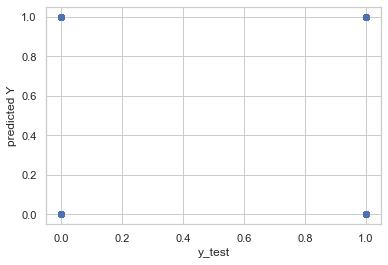

In [57]:
plt.scatter(y_test,preddtc)
plt.xlabel('y_test')
plt.ylabel('predicted Y')

SAVING THE MODEL

In [59]:
import joblib

In [60]:
joblib.dump(dtc,'avocado_predicted.pkl')

['avocado_predicted.pkl']